#### Evaluate different training GAN

In [18]:
from cpgan import init_yaml
import os
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import ndimage
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
from cpgan import init_yaml
from cpgan.eval.models_lib.ex6 import generator
import pandas as pd
from cpgan.ooppnm import img_process
from cpgan.ooppnm import pnm_sim
import random
import porespy as ps
from cpgan.ooppnm import img_process
from cpgan.ooppnm import pnm_sim_old
import pickle

img_prc = img_process.Image_process()

# make sure the result is reproducible
random.seed(10)
torch.manual_seed(0)
np.random.seed(0)


def downscale(img,scale_factor):

    # Define the scaling factors for each dimension
    scale_factors = (scale_factor,scale_factor,scale_factor)

    # Downscale the 3D boolean numpy array
    downscaled_boolean_data = ndimage.zoom(img.astype(float), scale_factors, order=0) > 0.5

    return downscaled_boolean_data

def plot_3D(img): 
    # Generating a 3D sine wave
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')

    # Set black and white colors based on boolean_data
    # colors = np.empty(img.shape + (4,), dtype=np.float32)
    colors = np.empty(img.shape, dtype=object)

    colors[img] = 'white'  # White for True values
    colors[~img] = 'black'  # Black for False values

    plt.axis('off')
    filled = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.bool)

    # Display the boolean_data using voxels
    ax.voxels(filled, facecolors=colors,edgecolors=colors)

    # Show the plot
    plt.show()

def load_model(epoch):
    # 0 5 10 15
    ex = 6
    f_yaml = init_yaml.yaml_f
    gen_path = os.path.join(f_yaml['model'],"ex{}/cganex{}-{}.pth".format(ex,ex,epoch))
    gen = generator.Generator(z_dim=200)
    gen.load_state_dict(torch.load(gen_path,map_location=torch.device('cpu')))
    gen.eval()
    return gen



/tmp/ipykernel_3211143/3110659124.py:55: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filled = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.bool)


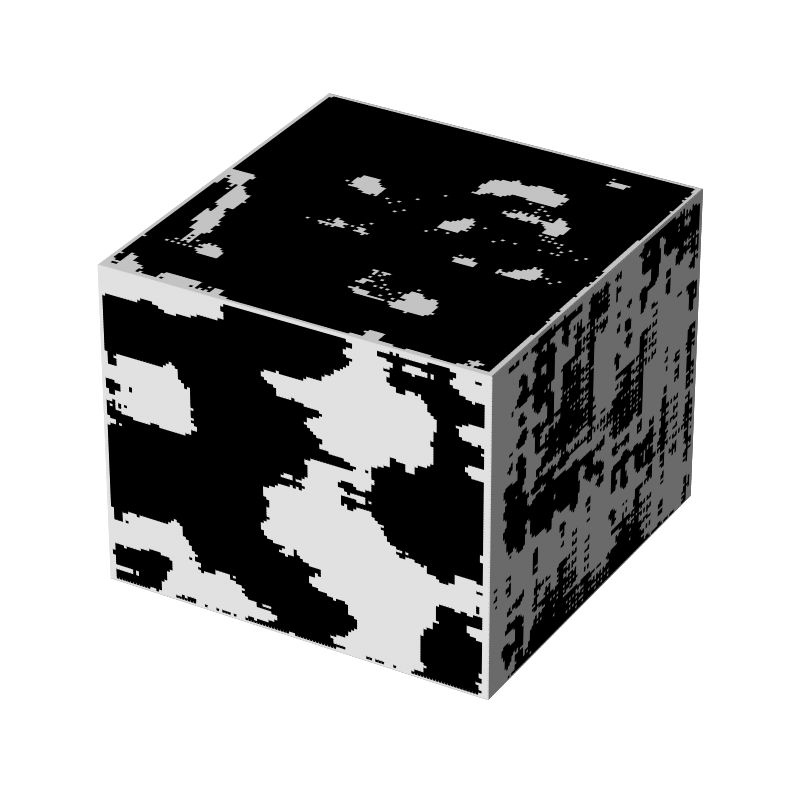

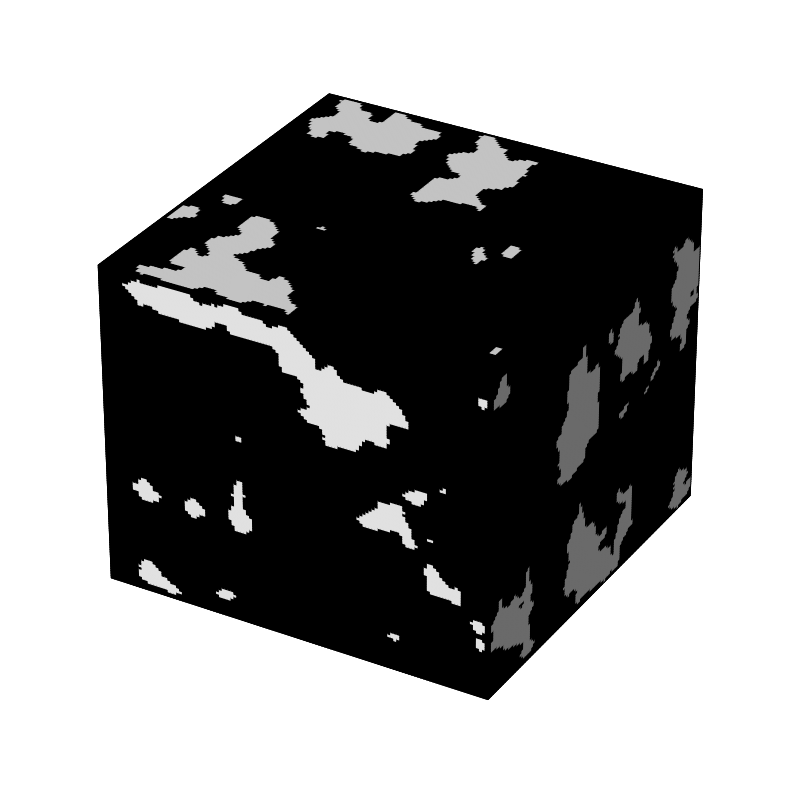

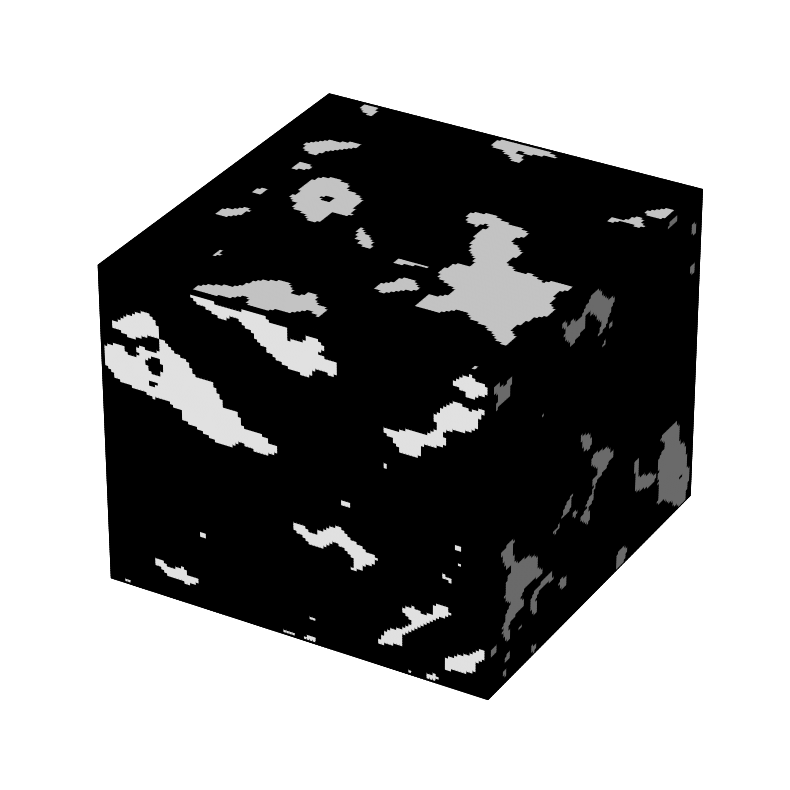

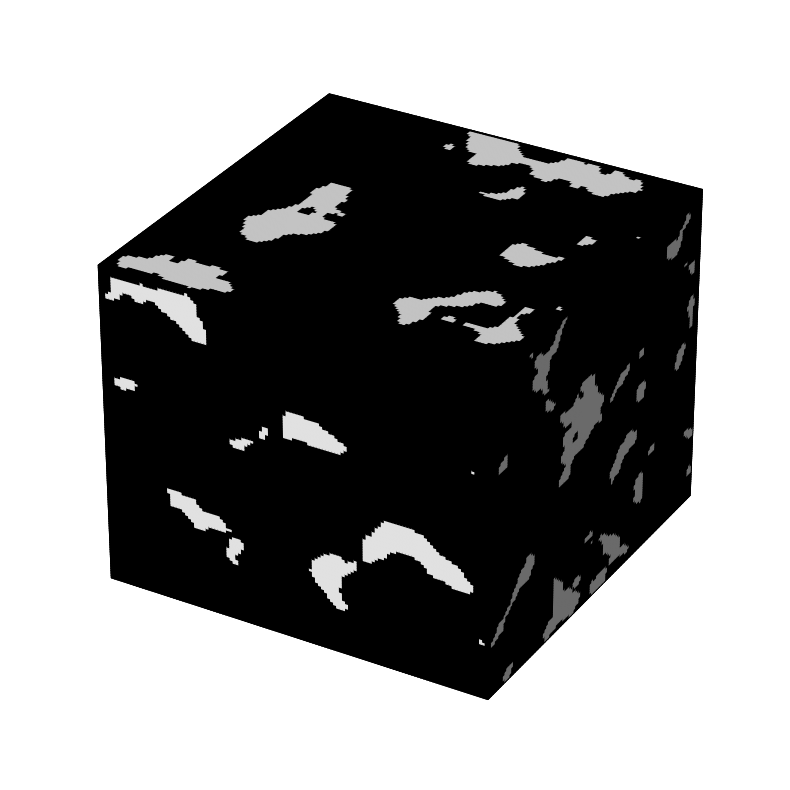

In [19]:
for i in [0,5,10,15]:
    
    gen = load_model(i)
    noise = torch.randn(1,200)
    
    fake_img = img_prc.clean_img(gen(noise))[0]>0.5
    plot_3D(fake_img)


/tmp/ipykernel_3211143/3110659124.py:55: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filled = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.bool)


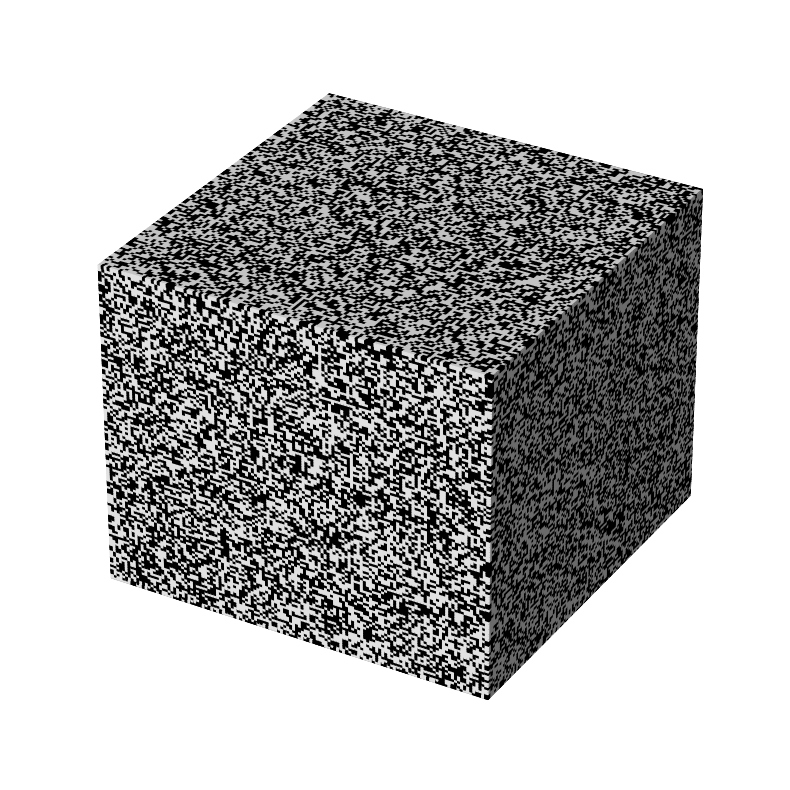

In [33]:
# pure fake noise
noise_vector = np.random.randn(128, 128, 128)>0
plot_3D(noise_vector)